<a href="https://colab.research.google.com/github/mylinh030203/AI/blob/main/Analysis_and_Prediction_Type_2_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bệnh tiểu đường loại 1 (T1D): Bệnh nhân phụ thuộc hoàn toàn vào insulin bên ngoài do tổn thương tuyến tụy.</br>
Bệnh tiểu đường loại 2 (T2D): Bệnh nhân có khả năng sản xuất insulin nhưng cơ thể không sử dụng hiệu quả..</br>
Bệnh tiểu đường loại 3 (gestational diabetes): Bệnh nhân phát triển bệnh trong khi mang thai..</br>

In [49]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#Kích thước của một hình ảnh đơn
onefig_size = (10,4)
#Kích thước của nhiều hình ảnh
multifigs_size = (20,22)

Dataset overview
Dataset bao gồm 70,692 hàng, 22 cột
( kết quả từ khảo sát https://www.cdc.gov/pcd/issues/2019/pdf/19_0109.pdf)
* `Diabetes_binary` : các nhãn; 0 = không bị tiểu đường,  1 =  tiền tiểu đường hoặc tiểu đường
* `HighBP` : blood pressure (huyết áp); 0 = no high BP, 1 = high BP
* `HighChol` : cholesterol; 0 = no high cholesterol, 1 = high cholesterol
* `CholCheck` : Kiểm tra cholesterol trong vòng 5 năm; 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
* `BMI` : Body Mass Index (chỉ số khối cơ thể)
* `Smoker	` :Hút ít nhất 100 điếu thuốc lá(5 bao thuốc) trong đời;  0 = no, 1 = yes
* `Stroke	` : Từng bị đọt quỵ; 0 = no, 1 = yes
* `HeartDiseaseorAttack	` : bệnh tim mạch vành (CHD) hoặc nhồi máu cơ tim (MI); 0 = no, 1 = yes
* `PhysActivity	` : hoạt động thể chất trong 30 ngày qua - không bao gồm công việc; ; 0 = no, 1 = yes
* `Fruits	` : Ăn trái cây 1 lần trở lên mỗi ngày; 0 = no, 1 = yes
* `Veggies	` : Ăn rau 1 lần trở lên mỗi ngày; 0 = no, 1 = yes
* `HvyAlcoholConsump	` : Người nghiện rượu nặng (đàn ông trưởng thành uống hơn 14 ly mỗi tuần và phụ nữ trưởng thành uống hơn 7 ly mỗi tuần);  0 = no, 1 = yes
* `AnyHealthcare	` : Có bất kỳ loại bảo hiểm chăm sóc sức khỏe nào, bao gồm bảo hiểm y tế, các chương trình trả trước như HMO, v.v; 0 = no, 1 = yes
* `NoDocbcCost	` : Có thời điểm nào trong 12 tháng qua bạn cần đến gặp bác sĩ nhưng không thể đi khám vì lý do chi phí?; 0 = no, 1 = yes
* `GenHlth	` : nhìn chung sức khỏe rất tốt: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
* `MentHlth	` : Sức khỏe tâm thần của bạn, bao gồm căng thẳng, trầm cảm và các vấn đề về cảm xúc, sức khỏe tâm thần của bạn ***không tốt*** trong bao nhiêu ngày trong 30 ngày qua
* `PhysHlth	` : sức khỏe thể chất của bạn, bao gồm bệnh tật và chấn thương thể chất, trong 30 ngày qua sức khỏe thể chất của bạn ***không tốt*** trong bao nhiêu ngày
* `DiffWalk	` :  gặp khó khăn nghiêm trọng khi đi bộ hoặc leo cầu thang;  0 = no, 1 = yes
* `Sex	` : 0 = female, 1 = male
* `Age	` : tuồi của người tham gia khảo sát; 1 = 18-24,( 2 = 25-29, 3= 30-34, 4=35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 =55-59), 9 = 60-64,( 10= 65-69,11=70-74,12=75-89),  13 = 80 trở lên
* `Education	` : 1 = Chưa bao giờ đi học hoặc chỉ đi học mẫu giáo, 2 = Lớp 1 đến lớp 8 (Tiểu học), 3 = Lớp 9 đến lớp 11 (Một số trường trung học), 4 = Lớp 12 hoặc GED (Tốt nghiệp trung học), 5 = Đại học 1 năm đến 3 năm (Một số trường cao đẳng hoặc kỹ thuật), 6 = Đại học 4 năm trở lên (Tốt nghiệp đại học)
* `Income	` : Thu nhập của người tham gia khảo sát; 1 = dưới $10.000, 5 = dưới  $35.000, 8 = $75.000 trở lên (2 = 10,000–15,000
3 = 15,000–20,000
4 = 20,000–25,000
5 = 25,000–35,000
6 = 35,000–50,000
7 = 50,001–75,000)




In [26]:
from google.colab import drive
drive.mount('/content/drive')
# Đọc dữ liệu từ file CSV
# df = pd.read_csv('diabetes.csv')
import os
path="//content//drive//MyDrive//HocMay//"
os.chdir(path)
%pwd

data = pd.read_csv('diabetes2015.csv', delimiter=',')
#5 dong dau, tail() 5 dong cuoi
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Thông tin của data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Data Cleaning
### Missing Data
Kiểm tra xem dữ liệu bị nhỡ bao nhiêu


In [28]:
data.isnull().sum()*100/data.shape[0]

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Thấy rằng không có dữ liệu bị thiếu nên chuyển qua bước phân tích để có thêm nhiều kiến thức

## Phân tích dữ liệu
Dữ liệu đã được làm sạch tổng cộng có 253680 dòng, bao gồm:
* Biến phân loại: `HighBP `, `HighChol`, `CholCheck`, `BMI `, `Smoker `, `Stroke `, `HeartDiseaseorAttack `, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, ` AnyHealthcare`, `NoDocbcCost`, `GenHlth`, `DiffWalk`,`Sex `, `Age`,`Education`, `Income`
* Biến số: , `BMI `, `MentHlth`, `PhysHlth`

Check giá trị 0-1 ở trong các biến phân loại chỉ mang 2 giá trị 0-1

In [29]:
def check( row_name):
  for value in data[row_name]:
    if value!=0.0 and value!=1.0:
      print(f"có giá trị  khác 0 hoặc 1 {row_name} cần kiếm tra lại xem có đúng phân thành 2 loại không - hoặc dữ liệu cột này bị sai")
      break;

def checkGenHlth():
   for value in data['GenHlth']:
    if value<1 or value >5:
      print("Có giá trị khác từ 1-5")
      break


def checkEducation():
   for value in data['Education']:
    if value<1 or value >6:
      print("Có giá trị khác từ 1-6")
      break


def checkIncome():
   for value in data['Income']:
    if value<1 or value >8:
      print("Có giá trị khác từ 1-8")
      break


def checkAge():
   for value in data['Age']:
    if value<1 or value >13:
      print("Có giá trị khác từ 1-13")
      break




check('HighBP')
check('Sex')
check('DiffWalk')
check('NoDocbcCost')
check('AnyHealthcare')
check('HvyAlcoholConsump')
check('Veggies')
check('Fruits')
check('PhysActivity')
check('HeartDiseaseorAttack')
check('Stroke')
check('Smoker')
check('CholCheck')
check('HighChol')
checkGenHlth()
checkEducation()
checkIncome()
checkAge()



 `BMI`, Theo [About Adult BMI](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html), xem xét `BMI_groups` dưới đây:

*    0.0 = Ốm: BMI $<$ 18.5
*    1.0 = Bình Thường: 18.5 $\leq$ BMI $<$ 25
*    2.0 = Thừa cân: 25 $\leq$ BMI $<$ 30
*    3.0 = Béo phì: BMI $\geq$ 30


In [30]:
def categorize_bmi(row):
  if row["BMI"] < 18.5:
    label = 0.0
  elif row["BMI"] < 25:
    label = 1.0
  elif row["BMI"] < 30:
    label = 2.0
  else:
    label = 3.0
  return label
# thực hiện việc áp dụng hàm categorize_bmi cho mỗi hàng trong DataFrame data. Kết quả của việc áp dụng này được gán vào cột mới có tên là 'bmi_groups'.
data['BMI_groups'] = data.apply(categorize_bmi, axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_groups
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,2.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,2.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,2.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,2.0


`MentHlth ` Theo khảo sát về sức khỏe tâm thần [Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques]( https://www.cdc.gov/pcd/issues/2019/19_0109.htm) chia làm 2 loại: </br>
1: Tin thần bình thường: 0 – 5 ngày</br>
2: Tin thần không tốt: 6 – 30 ngày

In [31]:
def categorize_MentHlth(row):
  if row["MentHlth"] < 5:
    label = 1.0
  else:
    label = 2.0
  return label
# thực hiện việc áp dụng hàm categorize_MentHlth cho mỗi hàng trong DataFrame data. Kết quả của việc áp dụng này được gán vào cột mới có tên là 'MentHlth_groups'.
data['MentHlth_groups'] = data.apply(categorize_MentHlth, axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_groups,MentHlth_groups
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,2.0,2.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,2.0,1.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2.0,1.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,2.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,2.0,1.0


`PhysHlth` Chia thành 3 loại: </br>
0.0 = Sức khỏe tốt: 0 - 3 ngày </br>
1.0 = Sức khỏe trung bình: 3 - 10 ngày </br>
2.0 = Sức khỏe yếu: 10 - 30 ngày </br>



In [32]:
def categorize_PhysHlth(row):
  if row["PhysHlth"] < 3:
    label = 0.0
  elif row["PhysHlth"] < 10:
    label = 1.0
  else:
    label = 2.0
  return label
# thực hiện việc áp dụng hàm categorize_PhysHlth cho mỗi hàng trong DataFrame data. Kết quả của việc áp dụng này được gán vào cột mới có tên là 'PhysHlth_groups'.
data['PhysHlth_groups'] = data.apply(categorize_PhysHlth, axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_groups,MentHlth_groups,PhysHlth_groups
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,5.0,30.0,0.0,1.0,4.0,6.0,8.0,2.0,2.0,2.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,12.0,6.0,8.0,2.0,1.0,0.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10.0,0.0,1.0,13.0,6.0,8.0,2.0,1.0,2.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,1.0,11.0,6.0,8.0,2.0,1.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,8.0,5.0,8.0,2.0,1.0,0.0


## Biến dự đoán
Vẽ biểu đồ phân phối của `Diabetes_binary`

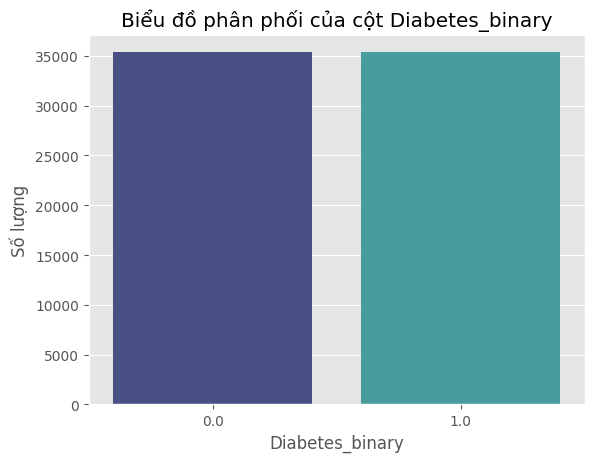

In [35]:
sns.countplot(x='Diabetes_binary', data=data, palette='mako')  # Vẽ countplot
plt.title('Biểu đồ phân phối của cột Diabetes_binary')  # Đặt tiêu đề biểu đồ
plt.xlabel('Diabetes_binary')  # Đặt nhãn trục x
plt.ylabel('Số lượng')  # Đặt nhãn trục y
plt.show()  # Hiển thị biểu đồ

### Biểu đồ của các biến phân loại

In [62]:
datanew = data.drop(['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_binary'], axis=1)
datanew.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,BMI_groups,MentHlth_groups,PhysHlth_groups
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3.0,0.0,1.0,4.0,6.0,8.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,1.0,12.0,6.0,8.0,2.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,13.0,6.0,8.0,2.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,3.0,0.0,1.0,11.0,6.0,8.0,2.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,8.0,5.0,8.0,2.0,1.0,0.0


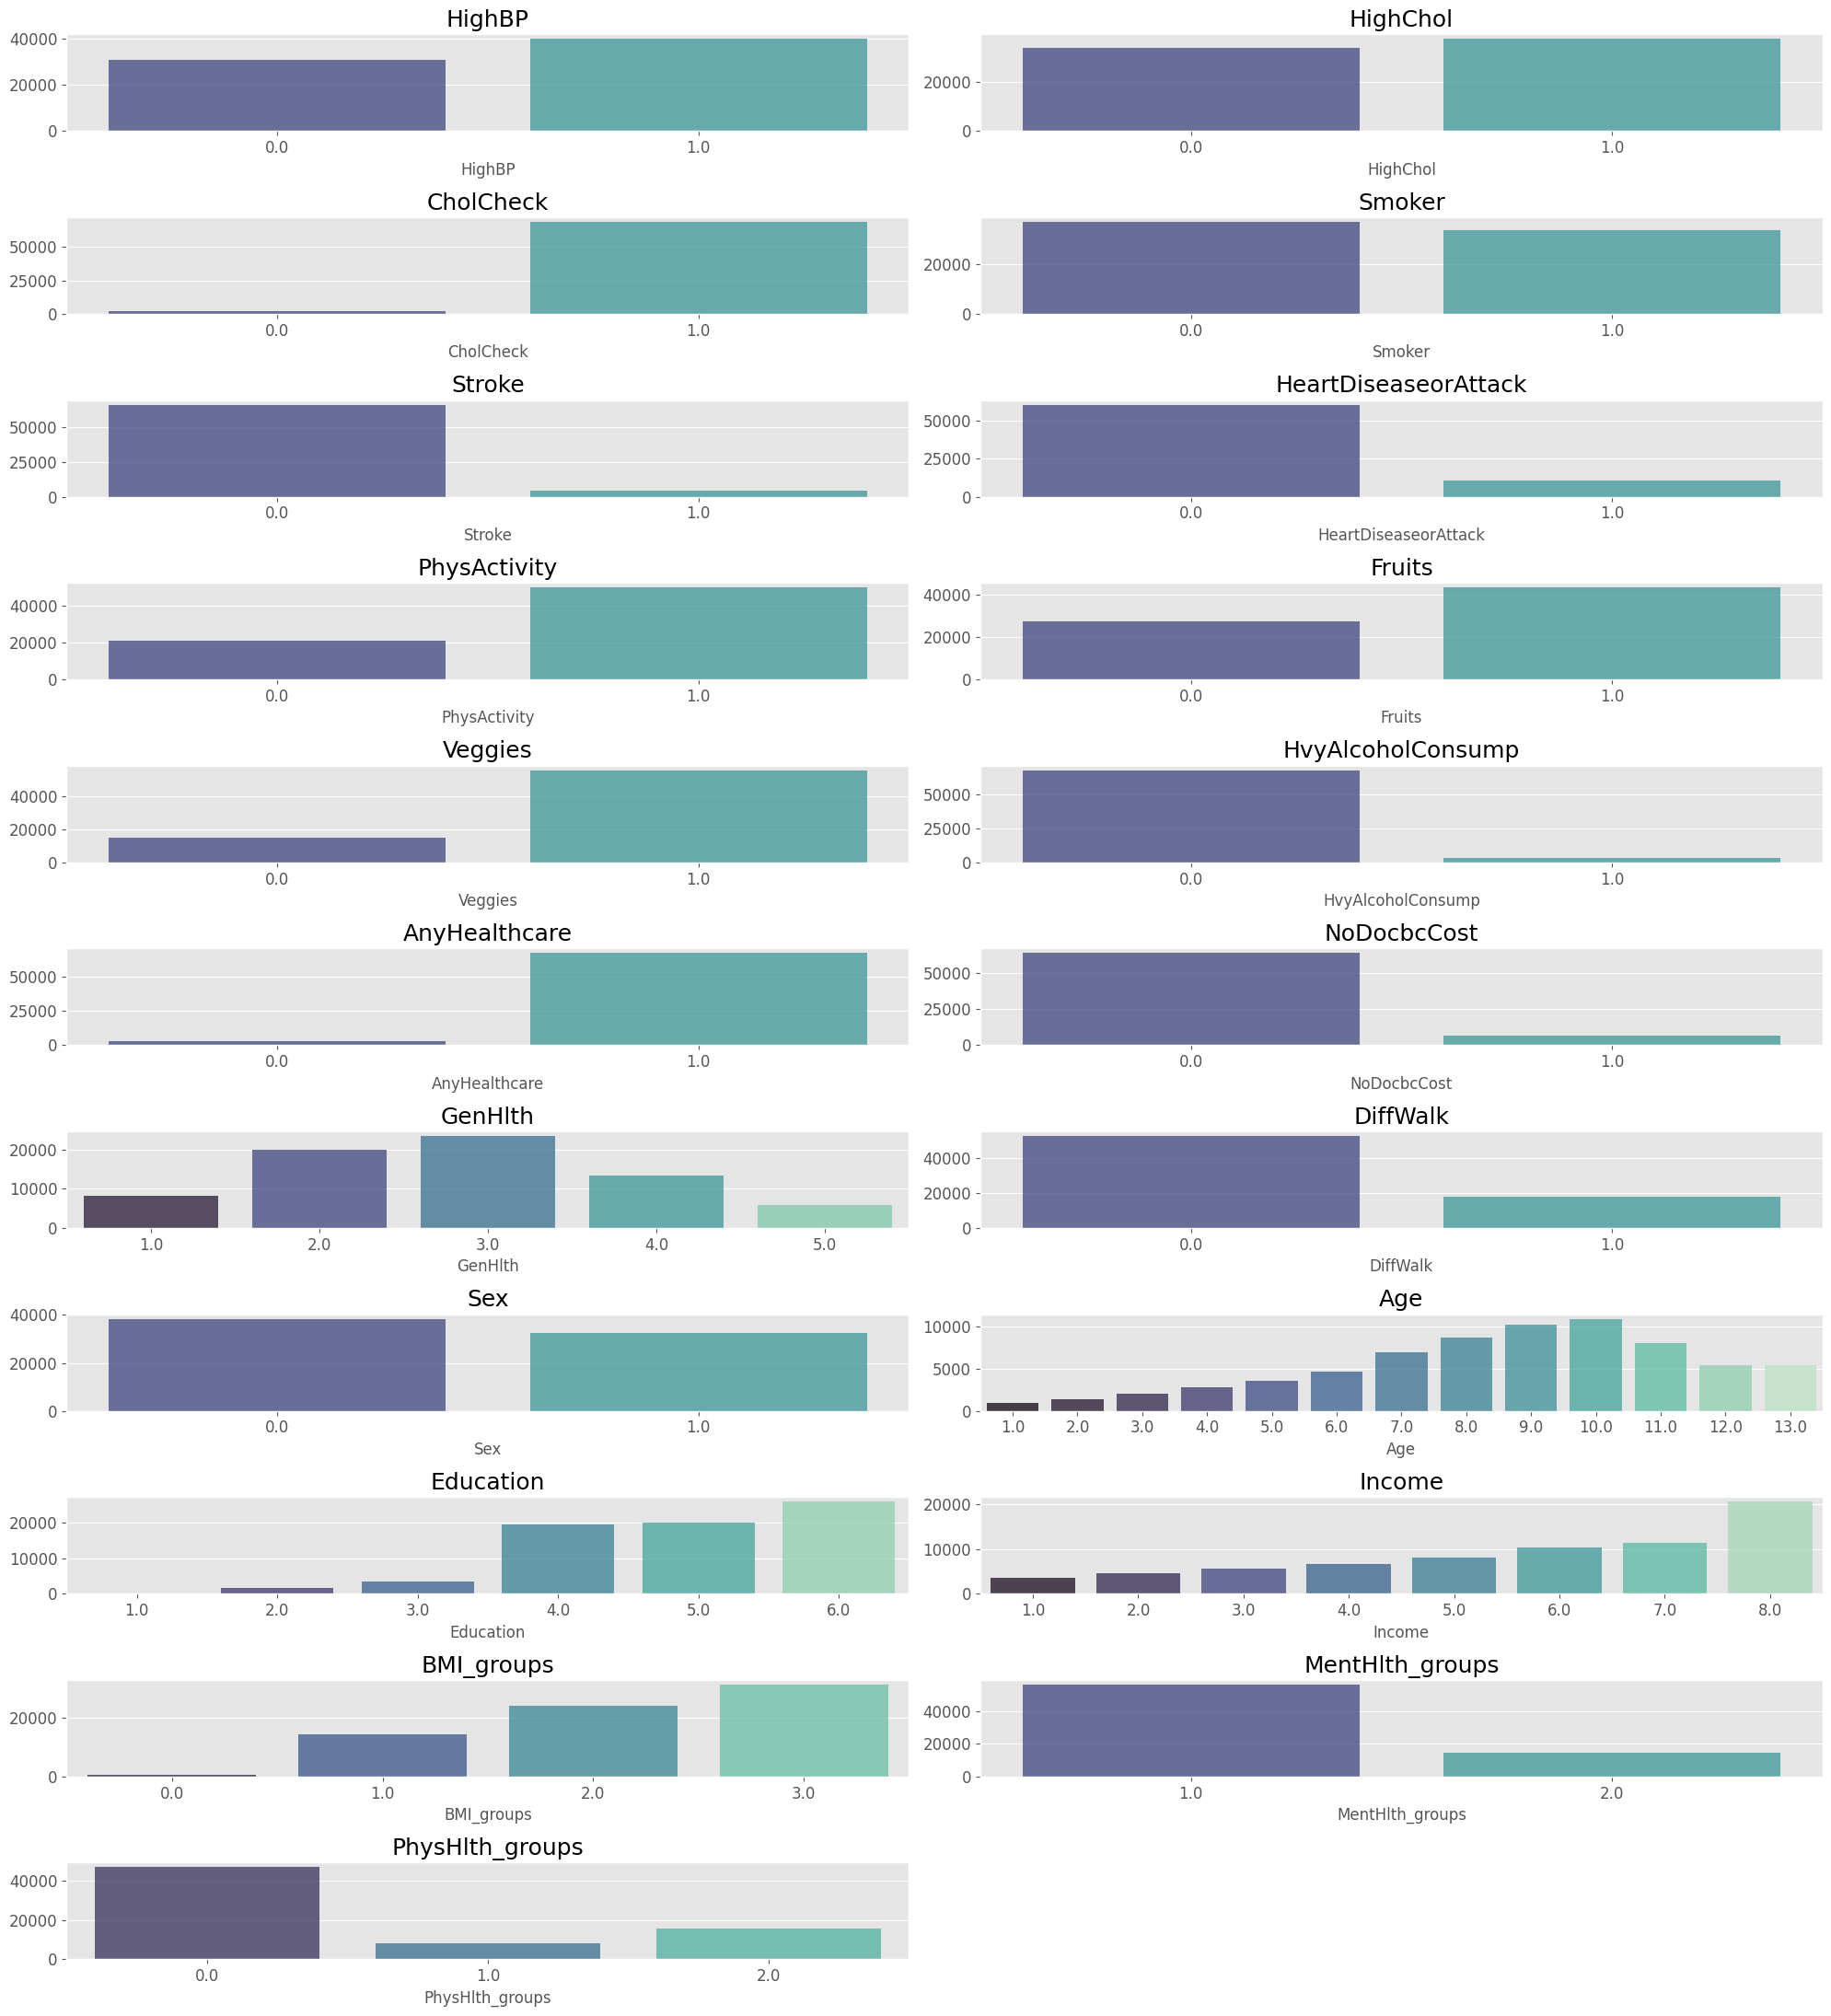

In [61]:

num_plot = len(datanew.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=multifigs_size)

if isinstance(axes, np.ndarray):
  list_axes = list(axes.flat)
else:
  list_axes = [axes]

for index, col in enumerate(datanew.columns):
  datanew_count = datanew[col].value_counts()

  if (datanew_count.index.dtype == np.int64):
    datanew_count.index = map(str, datanew_count.index)

  sns.barplot(ax = list_axes[index] , y = datanew_count.values, x = datanew_count.index , alpha=0.8, palette='mako')
  list_axes[index].set_title(col, fontsize=18)
  list_axes[index].tick_params(axis="x", labelsize=12)
  list_axes[index].tick_params(axis="y", labelsize=12)


for i in range(num_plot, len(list_axes)):
  list_axes[i].set_visible(False)


fig.tight_layout()
plt.show()